In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv('dataset/supermarket_sales.csv')

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').agg({
    'Quantity': 'sum'       # Sum of quantity sold
})
df = pd.DataFrame(df)
df['Time'] = np.arange(len(df.index))

In [17]:
df

,Quantity,Time
Date,,
2019-01-01,81,0
2019-01-02,48,1
2019-01-03,37,2
2019-01-04,32,3
2019-01-05,55,4
...,...,...
2019-03-26,52,84
2019-03-27,45,85
2019-03-28,48,86


<Axes: xlabel='Time', ylabel='Quantity'>

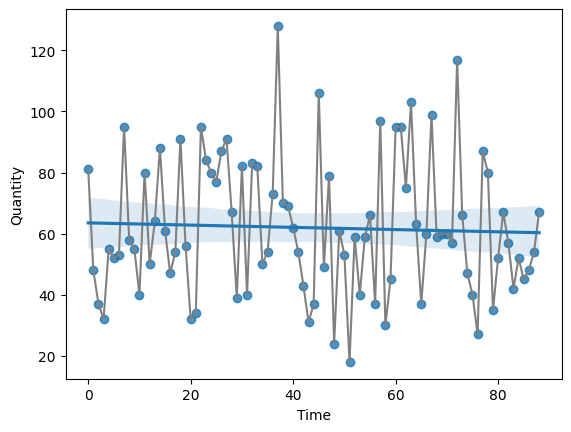

In [18]:
sns.lineplot(data = df, x = df.Time,y = df.Quantity, color = '0.50')
sns.regplot(data = df, x = df.Time, y = df.Quantity)

In [19]:
df['Lag_1'] = df['Quantity'].shift(1)
df

,Quantity,Time,Lag_1
Date,,,
2019-01-01,81,0,NaN
2019-01-02,48,1,81.0
2019-01-03,37,2,48.0
2019-01-04,32,3,37.0
2019-01-05,55,4,32.0
...,...,...,...
2019-03-26,52,84,42.0
2019-03-27,45,85,52.0
2019-03-28,48,86,45.0


<Axes: xlabel='Lag_1', ylabel='Quantity'>

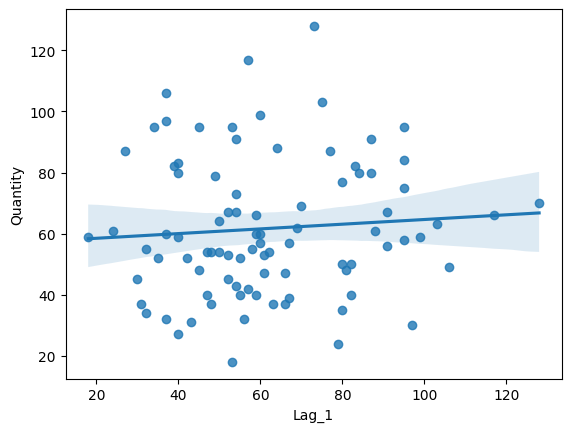

In [20]:
sns.regplot(data = df, x = df.Lag_1, y = df.Quantity)

In [ ]:
# Training data
X = df.loc[:, ['Time']]  # features
Y = df.loc[:, 'Quantity']  # target

In [22]:
model = LinearRegression()
model.fit(X, Y)

NameError: name 'X' is not defined